##typeOfResource📄 💾 🌏 🎼 📼

[typeOfResource](#tor)
- [get overall pass/fail scores](#overall)
- [get pass/fail scores by division](#scoresbydiv)
- [look at failing scores by collection](#scoresbycoll)
- [look at failing scores within a collection](#scoresincoll)

[plotting](#plot)

[co-occurrences](#co)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('min-mandatory-score_2016-07-08.csv')

In [2]:
# testing 1-2 1-2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965066 entries, 0 to 965065
Data columns (total 25 columns):
uuid              965066 non-null object
mms_id            965066 non-null int64
mms_type          965066 non-null object
coll_id           962212 non-null float64
division          965066 non-null object
title_1           965066 non-null int64
title_2           965066 non-null int64
title             965066 non-null float64
typeOfResource    965066 non-null int64
genre_1           965066 non-null int64
genre_2           965066 non-null int64
genre             965066 non-null float64
date_1            965066 non-null int64
date_2            965066 non-null int64
date_3            965066 non-null int64
date_4            965066 non-null int64
date              965066 non-null float64
identifier        965066 non-null int64
location_1        965066 non-null int64
location_2        965066 non-null int64
location_3        965066 non-null int64
location_4        965066 non-null int6

In [5]:
# check that basic completeness scores look OK
df[['title_1','typeOfResource', 'identifier', 'date_1', 'genre_1', 'location_1']].describe()

,title_1,typeOfResource,identifier,date_1,genre_1,location_1
count,965066.000000,965066.000000,965066.000000,965066.000000,965066.000000,965066.000000
mean,0.999995,0.981278,0.592315,0.598546,0.753671,0.917343
std,0.002276,0.135542,0.491404,0.490193,0.430873,0.275362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##typeOfResource<a id="tor"></a>
####assertion: presence of at least one typeOfResource element
- [get overall pass/fail scores](#overall)
- [get pass/fail scores by division](#scoresbydiv)
- [look at failing scores by collection](#scoresbycoll)
- [look at failing scores within a collection](#scoresincoll)

####get overall pass/fail scores<a id="overall"></a>

In [6]:
# df.identifier.value_counts()
df.typeOfResource.value_counts()

1    946998
0     18068
dtype: int64

####get pass/fail scores by division<a id="scoresbydiv"></a>

In [7]:
types_table = pd.pivot_table(df,index=['division'],columns=['typeOfResource'], 
                              aggfunc={'typeOfResource':len},fill_value=0)
types_table

typeOfResource  \
typeOfResource                                                                                                     0   
division                                                                                                               
Art and Picture Collection                                                                                         0   
Billy Rose Theatre Division                                                                                     1569   
Carl H. Pforzheimer Collection of Shelley and His Circle                                                         544   
Children's Center at 42nd St                                                                                       0   
Dorot Jewish Division                                                                                              0   
Dorothy and Lewis B. Cullman Center for Scholars & Writers                                                         0   
General Research Division                                                                                          3   
George Arents Collection                                                                                           0   
Henry W. and Albert A. Berg Collection of English and American Literature                                       1086   
Irma and Paul Milstein Division of United States History, Local History and Genealogy                             31   
Jerome Robbins Dance Division                                                                                   2388   
Jerome Robbins Dance Division - Audio and Moving Image                                                             0   
Lionel Pincus and Princess Firyal Map Division                                                                     0   
Manuscripts and Archives Division                                                                               1661   
Music Division                                                                                                  6155   
New York Public Library Archives                                                                                 134   
Null                                                                                                               1   
RHA                                                                                                                0   
Rare Book Division                                                                                                 1   
Rodgers and Hammerstein Archives of Recorded Sound                                                                 0   
Schomburg Center for Research in Black Culture, Art and Artifacts Division                                         0   
Schomburg Center for Research in Black Culture, Jean Blackwell Hutson Research and Reference Division              1   
Schomburg Center for Research in Black Culture, Manuscripts, Archives and Rare Books Division                   2465   
Schomburg Center for Research in Black Culture, Moving Image and Recorded Sound Division                           0   
Schomburg Center for Research in Black Culture, Photographs and Prints Division                                    0   
Schomburg General Research and Reference Division                                                                  0   
Science, Industry and Business Library: General Collection                                                         1   
Slavic and East European Collections                                                                               0   
Spencer Collection                                                                                                 0   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection               0   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection                    143   
The Miriam and Ira D. 

####look at failing scores by collection<a id="scoresbycoll"></a>

In [7]:
# look at failing typeOfResource scores by collection
df[df['typeOfResource'] == 0.0][['mms_id', 'coll_id', 'division']].sort('coll_id').tail()

,mms_id,coll_id,division
837429,4905038,NaN,General Research Division
906561,4994794,NaN,"The Miriam and Ira D. Wallach Division of Art,..."
906562,4994795,NaN,"The Miriam and Ira D. Wallach Division of Art,..."
926469,5039554,NaN,"The Miriam and Ira D. Wallach Division of Art,..."
929141,5046413,NaN,Rare Book Division


####look at failing scores within a collection<a id="scoresincoll"></a>

In [9]:
# look at failing typeOfResource scores within a collection
ftor = df[df['typeOfResource'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25792 is the Friedman-Abeles photograph collection
ftor_25792 = ftor[ftor['coll_id'] == 25792][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for content
ftor_25792.count()

mms_id      0
coll_id     0
division    0
dtype: int64

###write to csv

In [ ]:
# write to csv
ids_by_coll = pd.pivot_table(df,index=['coll_id'],columns=['identifier'],aggfunc={'identifier':len},fill_value=0)
ids_by_coll.to_csv('ids_by_coll.csv')

###plotting<a id="plot"></a>

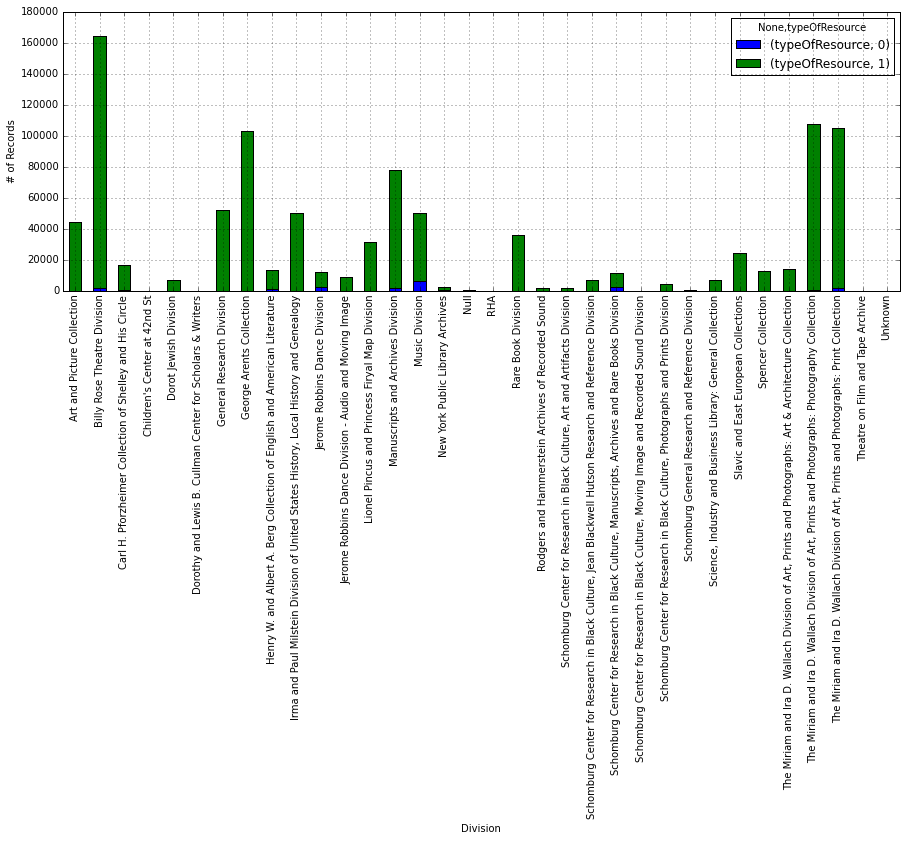

In [20]:
# create a bar chart plotting typeOfResource score counts by division
types_table = pd.pivot_table(df,index=['division'],columns=['typeOfResource'], aggfunc={'typeOfResource':len},fill_value=0)
typesscoresplot = types_table.plot(kind='bar', figsize=(15,5), stacked=True)
typesscoresplot.set_xlabel('Division')
typesscoresplot.set_ylabel('# of Records')

###co-occurences<a id="co"></a>

In [3]:
print "Records with typeOfResource element absent but genre present:"
notypes_genres = df[(df.typeOfResource == 0.0) & (df.genre_1 == 1.0)]
print len(notypes_genres)

print "Records with typeOfResource element absent but identifier present:"
notypes_ids = df[(df.typeOfResource == 0.0) & (df.identifier == 1.0)]
print len(notypes_ids)

print "Records with typeOfResource element absent but shelf locator present:"
notypes_loc3 = df[(df.typeOfResource == 0.0) & (df.location_3 == 1.0)]
print len(notypes_loc3)

Records with typeOfResource element absent but genre present:
4597
Records with typeOfResource element absent but identifier present:
15385
Records with typeOfResource element absent but shelf locator present:
18002


In [2]:
# generate list of records with typeOfResource element absent but genre present:
df[(df.typeOfResource == 0.0) & (df.genre_1 == 1.0)][['mms_id', 'coll_id', 'division']].sort(['coll_id']).tail()

,mms_id,coll_id,division
961882,5095001,48390,Manuscripts and Archives Division
961883,5095002,48390,Manuscripts and Archives Division
961868,5094987,48390,Manuscripts and Archives Division
961858,5094977,48390,Manuscripts and Archives Division
929141,5046413,NaN,Rare Book Division
